In [563]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [564]:
data=pd.read_excel('demonew.xlsx',sheet_name='cpa')

In [565]:
data

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,Output,Target_Default,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,0.0,0.0,ABC-6,NaN,0.0,0.0,0.0
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,0.0,0.0,ABC-6,NaN,0.0,0.0,0.0
2,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,0,150000000,0,0.0,0.0,ABC-7A,NaN,0.0,0.0,0.0
4,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,0,150000000,0,0.0,0.0,ABC-7A,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,99999-xxxxx,99999,NaN,FINANCIAL INSTITUTIONS GROUP,08396_F 08396_L,APP-3586,APPWF_FIG,NTB Custom,2018-06-28 16:25:52.630,CTPT-4612-xxxxx,...,0,500000000,0,0.0,0.0,ABC-6,NaN,0.0,0.0,0.0
15573,99999-xxxxx,99999,NaN,FINANCIAL INSTITUTIONS GROUP,08396_F 08396_L,APP-3586,APPWF_FIG,NTB Custom,2018-06-28 16:25:52.630,CTPT-4612-xxxxx,...,0,500000000,0,0.0,0.0,ABC-6,NaN,0.0,0.0,0.0
15574,99999-xxxxx,99999,NaN,FINANCIAL INSTITUTIONS GROUP,08396_F 08396_L,APP-3586,APPWF_FIG,NTB Custom,2018-06-28 16:25:52.630,CTPT-4612-xxxxx,...,0,500000000,0,0.0,0.0,ABC-6,NaN,0.0,0.0,0.0
15575,99999-xxxxx,99999,NaN,FINANCIAL INSTITUTIONS GROUP,08396_F 08396_L,APP-3586,APPWF_FIG,NTB Custom,2018-06-28 16:25:52.630,CTPT-4612-xxxxx,...,0,500000000,0,0.0,0.0,ABC-6,NaN,0.0,0.0,0.0


In [566]:
data.columns

Index(['CounterPartyName', 'IMAC_ID', 'CIF_ID', 'DepartmentName', 'CustomerRM',
       'App_ID', 'WorkflowName', 'PurposeOfCAM', 'DateOfApproval', 'GroupName',
       'GroupID', 'CCY', 'BaseUnit', 'CustomerSince', 'Industry',
       'EWS_AL_WLDateOfSanction', 'EWS_AL_WLPresent', 'SanctionDueDate',
       'InternalRating', 'RatingAgency', 'LongTermRating', 'ShortTermRating',
       'Outlook', 'RatingDate', 'UWSDeviation', 'TOMDeviation', 'AMLGrade',
       'ApplicationRating', 'AuditYear', 'FinancialRisk', 'BusinessRisk',
       'IndustryRisk', 'ManagementRisk', 'BasicBorrowerRiskScore',
       'ProjectRisk', 'BorrowerRIskScoreWithProject', 'ConductOfAccount',
       'ApprovingAuthority', 'ActuallyApprovedBy', 'OverrideYorN',
       'OverrideReason', 'ApproverName', 'ApproverComment',
       'ApproverTimeStamp', 'UFCEProvisionAssessment', 'CRILCStatus',
       'OrignalRating', 'OverRideRating', 'Justification',
       'ProposedBankingArrangement', 'FacilityId', 'FacilityType',
       'F

In [567]:
X = data.drop(['Target_Default','Output'],axis='columns')
y = data.Target_Default


In [568]:
X.shape

(15577, 71)

In [569]:
y.shape

(15577,)

In [570]:
y.value_counts()

0.0    12260
1.0     1702
Name: Target_Default, dtype: int64

In [571]:
y1=y.fillna(0)

In [572]:
y1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15572    0.0
15573    0.0
15574    0.0
15575    0.0
15576    0.0
Name: Target_Default, Length: 15577, dtype: float64

In [573]:
y1.isna().sum()

0

In [574]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [575]:
X.head(3)

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0
2,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,0,0,0,0,NaN,NaN,0.0,0.0,0.0


In [576]:
y1.head(3)

0    0.0
1    0.0
2    0.0
Name: Target_Default, dtype: float64

In [577]:
X_num= X.select_dtypes(['float','int'])

In [578]:
X_num.head()

,IMAC_ID,AuditYear,FinancialRisk,BusinessRisk,IndustryRisk,ManagementRisk,BasicBorrowerRiskScore,ProjectRisk,BorrowerRIskScoreWithProject,ConductOfAccount,...,TotalFundedSanctioned,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,MoratoriumDays,ATNW,TNW,EBITDAPer
0,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,0,0,3000000,0,3000000,0,NaN,0.0,0.0,0.0
1,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,0,0,3000000,0,3000000,0,NaN,0.0,0.0,0.0
2,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,0,0,0,0,0,0,NaN,0.0,0.0,0.0
3,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,0,0,150000000,0,150000000,0,NaN,0.0,0.0,0.0
4,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,0,0,150000000,0,150000000,0,NaN,0.0,0.0,0.0


In [579]:
X_num.shape

(15577, 23)

In [580]:
X_num.isna().sum()

IMAC_ID                             0
AuditYear                        3381
FinancialRisk                       0
BusinessRisk                        0
IndustryRisk                        0
ManagementRisk                      0
BasicBorrowerRiskScore              0
ProjectRisk                         0
BorrowerRIskScoreWithProject        0
ConductOfAccount                    0
UFCEProvisionAssessment         15577
SanctionedAmount                    0
OutStandingAmount                   0
TotalFundedSanctioned               0
TotalFundedOutStanding              0
TotalNonFundedSanctioned            0
TotalNonFundedOutStanding           0
GrandTotalSanctioned                0
GrandTotalOutStanding               0
MoratoriumDays                   8706
ATNW                                0
TNW                                 0
EBITDAPer                           0
dtype: int64

In [581]:
X_num.AuditYear.value_counts()                     

2016.0    3719
2017.0    3469
2015.0    2242
2018.0    1563
2014.0     739
2013.0     194
2019.0     147
2012.0      56
2021.0      35
2020.0      30
2022.0       2
Name: AuditYear, dtype: int64

In [582]:
X_num.AuditYear.ffill(axis=0,inplace=True)                     

C:\Users\chira\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [583]:
X_num.AuditYear.isna().sum()                    

0

In [584]:
X_num.AuditYear.value_counts()                     

2016.0    4722
2017.0    4357
2015.0    2893
2018.0    2048
2014.0     958
2013.0     266
2019.0     161
2012.0      95
2021.0      45
2020.0      30
2022.0       2
Name: AuditYear, dtype: int64

In [585]:
X_num.UFCEProvisionAssessment.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: UFCEProvisionAssessment, dtype: float64

In [586]:
X_num.UFCEProvisionAssessment.value_counts()

Series([], Name: UFCEProvisionAssessment, dtype: int64)

In [587]:
X_num.AuditYear.head()

0    2018.0
1    2018.0
2    2018.0
3    2018.0
4    2018.0
Name: AuditYear, dtype: float64

In [588]:
X_num.MoratoriumDays.value_counts()

0.0    6871
Name: MoratoriumDays, dtype: int64

In [589]:
X_num1=X_num.drop(['MoratoriumDays','UFCEProvisionAssessment','ATNW','TNW','EBITDAPer'],axis=1)

In [590]:
X_num1.head(3)

,IMAC_ID,AuditYear,FinancialRisk,BusinessRisk,IndustryRisk,ManagementRisk,BasicBorrowerRiskScore,ProjectRisk,BorrowerRIskScoreWithProject,ConductOfAccount,SanctionedAmount,OutStandingAmount,TotalFundedSanctioned,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding
0,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,3000000.0,0,0,0,3000000,0,3000000,0
1,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,3000000.0,0,0,0,3000000,0,3000000,0
2,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,0.0,0,0,0,0,0,0,0


In [591]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_num1,y1)

In [592]:
X_num1scores = pd.DataFrame(fit.scores_)
X_num1columns = pd.DataFrame(X_num1.columns)

In [593]:
featureScores = pd.concat([X_num1columns,X_num1scores],axis=1)
featureScores.columns = ['features','Score']


In [594]:
featureScores

,features,Score
0,IMAC_ID,3.118942e+05
1,AuditYear,4.546185e-02
2,FinancialRisk,1.639029e+02
3,BusinessRisk,3.660344e+00
4,IndustryRisk,4.612491e+00
5,ManagementRisk,2.075630e-01
6,BasicBorrowerRiskScore,1.586199e+02
7,ProjectRisk,2.130776e+00
8,BorrowerRIskScoreWithProject,5.747912e+01
9,ConductOfAccount,1.316137e+00


In [595]:
print(featureScores.nlargest(10,'Score')) 

                     features         Score
17      GrandTotalOutStanding  6.634611e+12
13     TotalFundedOutStanding  5.752789e+12
15  TotalNonFundedOutStanding  9.213916e+11
11          OutStandingAmount  7.755526e+11
12      TotalFundedSanctioned  2.108964e+11
16       GrandTotalSanctioned  6.114422e+10
14   TotalNonFundedSanctioned  5.145516e+10
10           SanctionedAmount  7.138391e+09
0                     IMAC_ID  3.118942e+05
2               FinancialRisk  1.639029e+02


In [596]:
y_train.isna().sum()

0

In [597]:
X_cat= X.select_dtypes(exclude=['float','int'])

In [598]:
X_cat.head()

,CounterPartyName,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,GroupID,...,ProposedBankingArrangement,FacilityId,FacilityType,FacilitySubtype,ParentFAC_ID,Tenor,Classification,DirectIndirect,IsCashBackCollateral,FacilityRating
0,100048-xxxxx,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,CTPT-1228,...,Sole,FAC-10743,LC,LC Capex usance Secured,NaN,3 Month(s),NonFunded,Direct,No,ABC-6
1,100048-xxxxx,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,CTPT-1228,...,Sole,FAC-10745,Loan,Short Term Loan Secured,FAC-10743,3 Month(s),Funded,Direct,No,ABC-6
2,100048-xxxxx,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,CTPT-1228,...,Sole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100048-xxxxx,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,CTPT-1228,...,Sole,FAC-10743,LC,LC Capex usance Secured,NaN,3 Month(s),NonFunded,Direct,No,ABC-7A
4,100048-xxxxx,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,CTPT-1228,...,Sole,FAC-10745,Loan,Short Term Loan Secured,FAC-10743,3 Month(s),Funded,Direct,No,ABC-7A


In [599]:
X_cat.isna().sum()

CounterPartyName                  0
CIF_ID                         1338
DepartmentName                    0
CustomerRM                      957
App_ID                            0
WorkflowName                      0
PurposeOfCAM                   5536
DateOfApproval                    0
GroupName                      8950
GroupID                        8950
CCY                               0
BaseUnit                       5488
CustomerSince                  1255
Industry                          5
EWS_AL_WLDateOfSanction       14554
EWS_AL_WLPresent              12183
SanctionDueDate                   0
InternalRating                 1287
RatingAgency                   9248
LongTermRating                 9438
ShortTermRating               11053
Outlook                        9426
RatingDate                     9248
UWSDeviation                      0
TOMDeviation                      0
AMLGrade                       6571
ApplicationRating              1287
ApprovingAuthority          

In [600]:
len(X_cat)

15577

In [601]:
null_morethan_20=X_cat.isna().sum()/len(X_cat)*100>20

In [602]:
dropping_features=null_morethan_20[null_morethan_20==1].index

In [603]:
dropping_features

Index(['PurposeOfCAM', 'GroupName', 'GroupID', 'BaseUnit',
       'EWS_AL_WLDateOfSanction', 'EWS_AL_WLPresent', 'RatingAgency',
       'LongTermRating', 'ShortTermRating', 'Outlook', 'RatingDate',
       'AMLGrade', 'ApprovingAuthority', 'ActuallyApprovedBy', 'ApproverName',
       'ApproverComment', 'ApproverTimeStamp', 'CRILCStatus', 'OrignalRating',
       'OverRideRating', 'Justification', 'ProposedBankingArrangement',
       'ParentFAC_ID', 'FacilityRating'],
      dtype='object')

In [604]:
d_features=['CounterPartyName','GroupName','GroupID', 'BaseUnit','DateOfApproval', 'SanctionDueDate',      
             'EWS_AL_WLDateOfSanction', 'EWS_AL_WLPresent','ApproverName', 'ApproverComment', 'ApproverTimeStamp',
             'Justification', 'ProposedBankingArrangement',
             'ParentFAC_ID','ActuallyApprovedBy','LongTermRating', 'ShortTermRating', 'Outlook', 'RatingDate',  'ParentFAC_ID', 'FacilityRating']

In [605]:
len(d_features)

21

In [606]:
X_cat1=X_cat.drop(d_features,axis=1)

In [607]:
X_cat1

,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,CCY,CustomerSince,Industry,InternalRating,...,CRILCStatus,OrignalRating,OverRideRating,FacilityId,FacilityType,FacilitySubtype,Tenor,Classification,DirectIndirect,IsCashBackCollateral
0,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,INR,21/02/2018,(IND060) POWER- NON-CONVENTIONAL ENERGY,UnRated,...,NaN,UnRated,NaN,FAC-10743,LC,LC Capex usance Secured,3 Month(s),NonFunded,Direct,No
1,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,INR,21/02/2018,(IND060) POWER- NON-CONVENTIONAL ENERGY,UnRated,...,NaN,UnRated,NaN,FAC-10745,Loan,Short Term Loan Secured,3 Month(s),Funded,Direct,No
2,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,INR,21/02/2018,(IND060) POWER- NON-CONVENTIONAL ENERGY,UnRated,...,NaN,UnRated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,INR,21/02/2018,(IND060) POWER- NON-CONVENTIONAL ENERGY,ABC-7A,...,Not Found,UnRated,NaN,FAC-10743,LC,LC Capex usance Secured,3 Month(s),NonFunded,Direct,No
4,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,INR,21/02/2018,(IND060) POWER- NON-CONVENTIONAL ENERGY,ABC-7A,...,Not Found,UnRated,NaN,FAC-10745,Loan,Short Term Loan Secured,3 Month(s),Funded,Direct,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,NaN,FINANCIAL INSTITUTIONS GROUP,08396_F 08396_L,APP-3586,APPWF_FIG,NTB Custom,INR,14/03/2018,(IND083) NBFC- Others,ABC-6,...,NaN,ABC-5,ABC-5,FAC-11875,Loan,Short Term Loan Secured,12 Month(s),Funded,Direct,No
15573,NaN,FINANCIAL INSTITUTIONS GROUP,08396_F 08396_L,APP-3586,APPWF_FIG,NTB Custom,INR,14/03/2018,(IND083) NBFC- Others,ABC-6,...,NaN,ABC-5,ABC-5,FAC-11876,Cash Credit,Cash Credit Secured,12 Month(s),Funded,Direct,No
15574,NaN,FINANCIAL INSTITUTIONS GROUP,08396_F 08396_L,APP-3586,APPWF_FIG,NTB Custom,INR,14/03/2018,(IND083) NBFC- Others,ABC-6,...,NaN,ABC-5,ABC-5,FAC-11877,Bond Limit,Bond Limit,12 Month(s),Funded,Direct,No
15575,NaN,FINANCIAL INSTITUTIONS GROUP,08396_F 08396_L,APP-3586,APPWF_FIG,NTB Custom,INR,14/03/2018,(IND083) NBFC- Others,ABC-6,...,NaN,ABC-5,ABC-5,FAC-11878,Line Of Credit,Line of Credit,24 Month(s),Funded,Direct,No


In [608]:
X_cat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15577 entries, 0 to 15576
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CIF_ID                14239 non-null  object
 1   DepartmentName        15577 non-null  object
 2   CustomerRM            14620 non-null  object
 3   App_ID                15577 non-null  object
 4   WorkflowName          15577 non-null  object
 5   PurposeOfCAM          10041 non-null  object
 6   CCY                   15577 non-null  object
 7   CustomerSince         14322 non-null  object
 8   Industry              15572 non-null  object
 9   InternalRating        14290 non-null  object
 10  RatingAgency          6329 non-null   object
 11  UWSDeviation          15577 non-null  object
 12  TOMDeviation          15577 non-null  object
 13  AMLGrade              9006 non-null   object
 14  ApplicationRating     14290 non-null  object
 15  ApprovingAuthority    10089 non-null

In [609]:
X_cat2=X_cat1.fillna('CNV')

In [610]:
X_cat2.AMLGrade.value_counts()

Low       7310
CNV       6571
Medium     962
High       734
Name: AMLGrade, dtype: int64

In [611]:
X_cat2.isna().sum()

CIF_ID                  0
DepartmentName          0
CustomerRM              0
App_ID                  0
WorkflowName            0
PurposeOfCAM            0
CCY                     0
CustomerSince           0
Industry                0
InternalRating          0
RatingAgency            0
UWSDeviation            0
TOMDeviation            0
AMLGrade                0
ApplicationRating       0
ApprovingAuthority      0
OverrideYorN            0
OverrideReason          0
CRILCStatus             0
OrignalRating           0
OverRideRating          0
FacilityId              0
FacilityType            0
FacilitySubtype         0
Tenor                   0
Classification          0
DirectIndirect          0
IsCashBackCollateral    0
dtype: int64

In [612]:
X_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15577 entries, 0 to 15576
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CIF_ID                15577 non-null  object
 1   DepartmentName        15577 non-null  object
 2   CustomerRM            15577 non-null  object
 3   App_ID                15577 non-null  object
 4   WorkflowName          15577 non-null  object
 5   PurposeOfCAM          15577 non-null  object
 6   CCY                   15577 non-null  object
 7   CustomerSince         15577 non-null  object
 8   Industry              15577 non-null  object
 9   InternalRating        15577 non-null  object
 10  RatingAgency          15577 non-null  object
 11  UWSDeviation          15577 non-null  object
 12  TOMDeviation          15577 non-null  object
 13  AMLGrade              15577 non-null  object
 14  ApplicationRating     15577 non-null  object
 15  ApprovingAuthority    15577 non-null

In [613]:
X_cat2.CIF_ID.value_counts()               

0                   1588
CNV                 1338
20103676             125
2019679               90
2013965               79
                    ... 
2097248                1
2074247                1
8009102010001121       1
20101196               1
20113782               1
Name: CIF_ID, Length: 1074, dtype: int64

In [614]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [615]:
X_cat2.columns

Index(['CIF_ID', 'DepartmentName', 'CustomerRM', 'App_ID', 'WorkflowName',
       'PurposeOfCAM', 'CCY', 'CustomerSince', 'Industry', 'InternalRating',
       'RatingAgency', 'UWSDeviation', 'TOMDeviation', 'AMLGrade',
       'ApplicationRating', 'ApprovingAuthority', 'OverrideYorN',
       'OverrideReason', 'CRILCStatus', 'OrignalRating', 'OverRideRating',
       'FacilityId', 'FacilityType', 'FacilitySubtype', 'Tenor',
       'Classification', 'DirectIndirect', 'IsCashBackCollateral'],
      dtype='object')

In [616]:
X_cat2["CIF_ID"].value_counts()

0                   1588
CNV                 1338
20103676             125
2019679               90
2013965               79
                    ... 
2097248                1
2074247                1
8009102010001121       1
20101196               1
20113782               1
Name: CIF_ID, Length: 1074, dtype: int64

In [617]:
aml=['Low' ,      
'CNV',       
'Medium','High']

In [618]:
label_encoder.fit_transform(aml)

array([2, 0, 3, 1], dtype=int64)

In [619]:
label_encoder.inverse_transform([2, 0, 3, 1])

array(['Low', 'CNV', 'Medium', 'High'], dtype='<U6')

In [620]:
list(X_cat1.FacilityType)

['LC',
 'Loan',
 nan,
 'LC',
 'Loan',
 'LC',
 'Loan',
 nan,
 'LC',
 'Loan',
 nan,
 nan,
 nan,
 'LC',
 'Loan',
 'Credit Card',
 nan,
 nan,
 'LC',
 'BG',
 nan,
 nan,
 'Cash Credit',
 'WCDL',
 'Loan',
 'LC',
 'LC',
 'Discounting',
 'LER',
 'Cash Credit',
 'WCDL',
 'Loan',
 'LC',
 'LC',
 'Discounting',
 'LER',
 'Loan',
 'Loan',
 'Overdraft',
 nan,
 nan,
 nan,
 'Overdraft',
 'Loan',
 nan,
 'Loan',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Loan',
 'LER',
 'Overdraft',
 'Loan',
 nan,
 'Loan',
 nan,
 nan,
 nan,
 'Cash Credit',
 'WCDL',
 'Packing Credit',
 'Discounting',
 'LC',
 'BG',
 'LER',
 'Postshipment Credit',
 'LC',
 'EPC',
 'EPC',
 'Loan',
 'Cash Credit',
 'WCDL',
 'Packing Credit',
 'Discounting',
 'LC',
 'BG',
 'LER',
 'Postshipment Credit',
 'LC',
 'EPC',
 'EPC',
 'Loan',
 'Loan',
 'LC',
 'BG',
 'Overdraft',
 'LC',
 nan,
 nan,
 nan,
 nan,
 nan,
 'BG',
 'LC',
 'Cash Credit',
 'WCDL',
 'Postshipment Credit',
 'Packing Credit',
 'LER',
 nan,
 nan,
 nan,
 nan,
 'LC',
 'Overdraft',
 nan,
 nan,
 nan

In [621]:
X_cat2["AMLGrade"] = label_encoder.fit_transform(X_cat2["AMLGrade"])

In [622]:
AMLGrade_ile=(label_encoder.inverse_transform(X_cat2["AMLGrade"]))
AMLGrade_ile

array(['Low', 'Low', 'Low', ..., 'High', 'High', 'High'], dtype=object)

In [623]:
X_cat2["CCY"] = label_encoder.fit_transform(X_cat2["CCY"])

In [624]:
list(X_cat2["CCY"])

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [625]:
ccy_ile=(label_encoder.inverse_transform(list(X_cat2["CCY"])))
ccy_ile

array(['INR', 'INR', 'INR', ..., 'INR', 'INR', 'INR'], dtype=object)

In [626]:
X_cat2["FacilityType"] = label_encoder.fit_transform(X_cat2["FacilityType"])

In [627]:
FacilityType_ile=(label_encoder.inverse_transform(X_cat2["FacilityType"]))
FacilityType_ile

array(['LC', 'Loan', 'CNV', ..., 'Bond Limit', 'Line Of Credit', 'Loan'],
      dtype=object)

In [628]:
X_cat2["FacilitySubtype"] = label_encoder.fit_transform(X_cat2["FacilitySubtype"])

In [629]:
X_cat2["IsCashBackCollateral"] = label_encoder.fit_transform(X_cat2["IsCashBackCollateral"])

In [630]:
X_cat2["WorkflowName"] = label_encoder.fit_transform(X_cat2["WorkflowName"])

In [631]:
X_cat2["ApplicationRating"] = label_encoder.fit_transform(X_cat2["ApplicationRating"])

In [632]:
X_cat2["Classification"] = label_encoder.fit_transform(X_cat2["Classification"])

In [633]:
X_cat2["PurposeOfCAM"] = label_encoder.fit_transform(X_cat2["PurposeOfCAM"])

In [634]:
X_cat2["ApprovingAuthority"] = label_encoder.fit_transform(X_cat2["ApprovingAuthority"])

In [635]:
X_cat2["CRILCStatus"] = label_encoder.fit_transform(X_cat2["CRILCStatus"])

In [636]:
X_cat2["Industry"] = label_encoder.fit_transform(X_cat2["Industry"])


In [637]:
X_cat2["UWSDeviation"] = label_encoder.fit_transform(X_cat2["UWSDeviation"])


In [638]:
X_cat2["TOMDeviation"] = label_encoder.fit_transform(X_cat2["TOMDeviation"])


In [639]:
X_cat2["OverrideYorN"] = label_encoder.fit_transform(X_cat2["OverrideYorN"])


In [640]:
  X_cat2["DepartmentName"] = label_encoder.fit_transform(X_cat2["DepartmentName"])
      

In [641]:
  X_cat2["InternalRating"] = label_encoder.fit_transform(X_cat2["InternalRating"])


In [642]:
  X_cat2["RatingAgency"] = label_encoder.fit_transform(X_cat2["RatingAgency"])         

In [643]:
  X_cat2["OrignalRating"] = label_encoder.fit_transform(X_cat2["OrignalRating"])


In [644]:
  X_cat2["OverRideRating"] = label_encoder.fit_transform(X_cat2["OverRideRating"])


In [645]:
  X_cat2["DirectIndirect"] = label_encoder.fit_transform(X_cat2["DirectIndirect"])


In [646]:
X_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15577 entries, 0 to 15576
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CIF_ID                15577 non-null  object
 1   DepartmentName        15577 non-null  int32 
 2   CustomerRM            15577 non-null  object
 3   App_ID                15577 non-null  object
 4   WorkflowName          15577 non-null  int32 
 5   PurposeOfCAM          15577 non-null  int32 
 6   CCY                   15577 non-null  int32 
 7   CustomerSince         15577 non-null  object
 8   Industry              15577 non-null  int32 
 9   InternalRating        15577 non-null  int32 
 10  RatingAgency          15577 non-null  int32 
 11  UWSDeviation          15577 non-null  int32 
 12  TOMDeviation          15577 non-null  int32 
 13  AMLGrade              15577 non-null  int32 
 14  ApplicationRating     15577 non-null  int32 
 15  ApprovingAuthority    15577 non-null

In [647]:
X_cat_num=X_cat2.select_dtypes(['int','float'])

In [648]:
X_cat_num

,DepartmentName,WorkflowName,PurposeOfCAM,CCY,Industry,InternalRating,RatingAgency,UWSDeviation,TOMDeviation,AMLGrade,...,ApprovingAuthority,OverrideYorN,CRILCStatus,OrignalRating,OverRideRating,FacilityType,FacilitySubtype,Classification,DirectIndirect,IsCashBackCollateral
0,2,1,5,1,49,13,2,0,0,2,...,9,0,0,12,11,10,32,6,1,1
1,2,1,5,1,49,13,2,0,0,2,...,9,0,0,12,11,15,62,3,1,1
2,2,1,5,1,49,13,2,0,0,2,...,9,0,0,12,11,3,13,1,0,0
3,2,1,5,1,49,7,2,0,0,2,...,9,0,1,12,11,10,32,6,1,1
4,2,1,5,1,49,7,2,0,0,2,...,9,0,1,12,11,15,62,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,5,2,5,1,68,6,1,0,0,1,...,7,0,0,5,5,15,62,3,1,1
15573,5,2,5,1,68,6,1,0,0,1,...,7,0,0,5,5,4,14,3,1,1
15574,5,2,5,1,68,6,1,0,0,1,...,7,0,0,5,5,2,11,3,1,1
15575,5,2,5,1,68,6,1,0,0,1,...,7,0,0,5,5,14,39,3,1,1


In [649]:
bestfeatures2 = SelectKBest(score_func=chi2, k=10)
fit2 = bestfeatures2.fit(X_cat_num,y1)

In [650]:
X_cat_numscores = pd.DataFrame(fit2.scores_)
X_cat_numscores

,0
0,2.728714
1,183.240060
2,742.452422
3,0.034302
4,382.133321
5,239.321942
6,0.021586
7,467.276679
8,1.126785
9,852.279979


In [651]:
X_cat_numcolumns = pd.DataFrame(X_cat_num.columns)
X_cat_numcolumns

,0
0,DepartmentName
1,WorkflowName
2,PurposeOfCAM
3,CCY
4,Industry
5,InternalRating
6,RatingAgency
7,UWSDeviation
8,TOMDeviation
9,AMLGrade


In [652]:
featureScores2 = pd.concat([X_cat_numcolumns,X_cat_numscores],axis=1)
featureScores2.columns = ['features','Score']


In [653]:
featureScores2

,features,Score
0,DepartmentName,2.728714
1,WorkflowName,183.240060
2,PurposeOfCAM,742.452422
3,CCY,0.034302
4,Industry,382.133321
5,InternalRating,239.321942
6,RatingAgency,0.021586
7,UWSDeviation,467.276679
8,TOMDeviation,1.126785
9,AMLGrade,852.279979


In [654]:
print(featureScores2.nlargest(10,'Score')) 

             features       Score
9            AMLGrade  852.279979
2        PurposeOfCAM  742.452422
7        UWSDeviation  467.276679
13        CRILCStatus  387.697413
4            Industry  382.133321
17    FacilitySubtype  304.055962
5      InternalRating  239.321942
10  ApplicationRating  239.321942
1        WorkflowName  183.240060
15     OverRideRating  165.470783


In [655]:
col1=list(featureScores2.nlargest(10,'Score').features)  
col1

['AMLGrade',
 'PurposeOfCAM',
 'UWSDeviation',
 'CRILCStatus',
 'Industry',
 'FacilitySubtype',
 'InternalRating',
 'ApplicationRating',
 'WorkflowName',
 'OverRideRating']

In [656]:
col2=list(featureScores.nlargest(10,'Score').features)
col2

['GrandTotalOutStanding',
 'TotalFundedOutStanding',
 'TotalNonFundedOutStanding',
 'OutStandingAmount',
 'TotalFundedSanctioned',
 'GrandTotalSanctioned',
 'TotalNonFundedSanctioned',
 'SanctionedAmount',
 'IMAC_ID',
 'FinancialRisk']

In [657]:
cols=col1+col2

In [658]:
cols

['AMLGrade',
 'PurposeOfCAM',
 'UWSDeviation',
 'CRILCStatus',
 'Industry',
 'FacilitySubtype',
 'InternalRating',
 'ApplicationRating',
 'WorkflowName',
 'OverRideRating',
 'GrandTotalOutStanding',
 'TotalFundedOutStanding',
 'TotalNonFundedOutStanding',
 'OutStandingAmount',
 'TotalFundedSanctioned',
 'GrandTotalSanctioned',
 'TotalNonFundedSanctioned',
 'SanctionedAmount',
 'IMAC_ID',
 'FinancialRisk']

In [659]:
len(cols)

20

In [660]:
cols.remove('UWSDeviation')

In [661]:
cols

['AMLGrade',
 'PurposeOfCAM',
 'CRILCStatus',
 'Industry',
 'FacilitySubtype',
 'InternalRating',
 'ApplicationRating',
 'WorkflowName',
 'OverRideRating',
 'GrandTotalOutStanding',
 'TotalFundedOutStanding',
 'TotalNonFundedOutStanding',
 'OutStandingAmount',
 'TotalFundedSanctioned',
 'GrandTotalSanctioned',
 'TotalNonFundedSanctioned',
 'SanctionedAmount',
 'IMAC_ID',
 'FinancialRisk']

In [662]:
cols.remove('CRILCStatus')

In [663]:
cols.remove('IMAC_ID')

In [664]:
cols

['AMLGrade',
 'PurposeOfCAM',
 'Industry',
 'FacilitySubtype',
 'InternalRating',
 'ApplicationRating',
 'WorkflowName',
 'OverRideRating',
 'GrandTotalOutStanding',
 'TotalFundedOutStanding',
 'TotalNonFundedOutStanding',
 'OutStandingAmount',
 'TotalFundedSanctioned',
 'GrandTotalSanctioned',
 'TotalNonFundedSanctioned',
 'SanctionedAmount',
 'FinancialRisk']

In [665]:
X_num1.head()

,IMAC_ID,AuditYear,FinancialRisk,BusinessRisk,IndustryRisk,ManagementRisk,BasicBorrowerRiskScore,ProjectRisk,BorrowerRIskScoreWithProject,ConductOfAccount,SanctionedAmount,OutStandingAmount,TotalFundedSanctioned,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding
0,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,3000000.0,0,0,0,3000000,0,3000000,0
1,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,3000000.0,0,0,0,3000000,0,3000000,0
2,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,0.0,0,0,0,0,0,0,0
3,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,0.0,0,0,0,150000000,0,150000000,0
4,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,0.0,0,0,0,150000000,0,150000000,0


In [666]:
X_cat_num.head()

,DepartmentName,WorkflowName,PurposeOfCAM,CCY,Industry,InternalRating,RatingAgency,UWSDeviation,TOMDeviation,AMLGrade,...,ApprovingAuthority,OverrideYorN,CRILCStatus,OrignalRating,OverRideRating,FacilityType,FacilitySubtype,Classification,DirectIndirect,IsCashBackCollateral
0,2,1,5,1,49,13,2,0,0,2,...,9,0,0,12,11,10,32,6,1,1
1,2,1,5,1,49,13,2,0,0,2,...,9,0,0,12,11,15,62,3,1,1
2,2,1,5,1,49,13,2,0,0,2,...,9,0,0,12,11,3,13,1,0,0
3,2,1,5,1,49,7,2,0,0,2,...,9,0,1,12,11,10,32,6,1,1
4,2,1,5,1,49,7,2,0,0,2,...,9,0,1,12,11,15,62,3,1,1


In [667]:
new_df=pd.concat([X_num1,X_cat_num],axis=1)

In [668]:
new_df

,IMAC_ID,AuditYear,FinancialRisk,BusinessRisk,IndustryRisk,ManagementRisk,BasicBorrowerRiskScore,ProjectRisk,BorrowerRIskScoreWithProject,ConductOfAccount,...,ApprovingAuthority,OverrideYorN,CRILCStatus,OrignalRating,OverRideRating,FacilityType,FacilitySubtype,Classification,DirectIndirect,IsCashBackCollateral
0,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,9,0,0,12,11,10,32,6,1,1
1,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,9,0,0,12,11,15,62,3,1,1
2,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,9,0,0,12,11,3,13,1,0,0
3,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,9,0,1,12,11,10,32,6,1,1
4,100048,2018.0,9.5,2.4,2.57,2.29,5.6,1.0,5.6,1.0,...,9,0,1,12,11,15,62,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,99999,2018.0,0.0,0.0,0.00,0.00,5.0,0.0,0.0,0.0,...,7,0,0,5,5,15,62,3,1,1
15573,99999,2018.0,0.0,0.0,0.00,0.00,5.0,0.0,0.0,0.0,...,7,0,0,5,5,4,14,3,1,1
15574,99999,2018.0,0.0,0.0,0.00,0.00,5.0,0.0,0.0,0.0,...,7,0,0,5,5,2,11,3,1,1
15575,99999,2018.0,0.0,0.0,0.00,0.00,5.0,0.0,0.0,0.0,...,7,0,0,5,5,14,39,3,1,1


In [669]:
final_df=new_df[cols]

In [670]:
final_df

,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk
0,2,5,49,32,13,13,1,11,0,0,0,0,0,3000000,3000000,3000000.0,9.5
1,2,5,49,62,13,13,1,11,0,0,0,0,0,3000000,3000000,3000000.0,9.5
2,2,5,49,13,13,13,1,11,0,0,0,0,0,0,0,0.0,9.5
3,2,5,49,32,7,7,1,11,0,0,0,0,0,150000000,150000000,0.0,9.5
4,2,5,49,62,7,7,1,11,0,0,0,0,0,150000000,150000000,0.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,1,5,68,62,6,6,2,5,0,0,0,0,500000000,500000000,0,250000000.0,0.0
15573,1,5,68,14,6,6,2,5,0,0,0,0,500000000,500000000,0,250000000.0,0.0
15574,1,5,68,11,6,6,2,5,0,0,0,0,500000000,500000000,0,250000000.0,0.0
15575,1,5,68,39,6,6,2,5,0,0,0,0,500000000,500000000,0,500000000.0,0.0


In [671]:
y1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target_Default, dtype: float64

In [672]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df, y1, test_size = 0.3, random_state = 0)



In [673]:
X_train.shape

(10903, 17)

In [674]:
X_test.shape

(4674, 17)

In [675]:
y_train.shape

(10903,)

In [676]:
y_test.shape

(4674,)

RF

In [677]:
from sklearn.ensemble import RandomForestClassifier

In [678]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')


In [679]:
model_rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy')

In [680]:
y_pred = model_rf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [681]:
y_pred.shape

(4674,)

In [682]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [683]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4167
         1.0       1.00      0.99      0.99       507

    accuracy                           1.00      4674
   macro avg       1.00      0.99      1.00      4674
weighted avg       1.00      1.00      1.00      4674



In [684]:
print(confusion_matrix(y_test,y_pred))


[[4165    2]
 [   5  502]]


In [685]:
print('accuracy is ',accuracy_score(y_test,y_pred))


accuracy is  0.998502353444587


ADA

In [686]:
from sklearn.ensemble import AdaBoostClassifier


In [687]:
model_adc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=123)

In [688]:
model_adc.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100, random_state=123)

In [689]:
y_pred_adc=model_adc.predict(X_test)

In [690]:
print(confusion_matrix(y_test,y_pred_adc))


[[4162    5]
 [   4  503]]


In [691]:
print(classification_report(y_test,y_pred_adc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4167
         1.0       0.99      0.99      0.99       507

    accuracy                           1.00      4674
   macro avg       0.99      1.00      1.00      4674
weighted avg       1.00      1.00      1.00      4674



In [692]:
print('accuracy is ',accuracy_score(y_test,y_pred_adc))


accuracy is  0.9980744544287549


In [693]:
final_df.head(3)

,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk
0,2,5,49,32,13,13,1,11,0,0,0,0,0,3000000,3000000,3000000.0,9.5
1,2,5,49,62,13,13,1,11,0,0,0,0,0,3000000,3000000,3000000.0,9.5
2,2,5,49,13,13,13,1,11,0,0,0,0,0,0,0,0.0,9.5


In [694]:
final_df.PurposeOfCAM.unique()

array([5, 3, 6, 0, 2, 4, 7, 1])

In [695]:
final_df.FacilitySubtype.unique()

array([32, 62, 13, 34, 16, 52, 15, 74, 63, 35, 42,  7, 37, 66, 47, 43, 64,
       14, 73, 50,  6,  1, 54, 41, 19, 48, 46, 58, 60, 71, 17, 53, 30, 49,
       55, 39, 69, 57, 20, 51, 22,  2, 29, 36, 27, 59, 56, 72,  3, 44, 12,
       67, 31, 11, 18, 61, 38, 33, 10,  9, 21, 68, 28, 24, 23, 25, 45,  4,
        8, 40, 65,  0, 26, 70,  5])

#K-Means

In [696]:
from sklearn.cluster import KMeans

In [697]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(final_df)
    wcss.append(km.inertia_)

In [698]:
wcss

[8.324619449918641e+22,
 4.591358150485634e+22,
 3.565968216018206e+22,
 2.9493425091258983e+22,
 2.3863550963124854e+22,
 2.062635078584579e+22,
 1.8396095005367846e+22,
 1.637637362403582e+22,
 1.4655723770190563e+22,
 1.3247994111769188e+22]

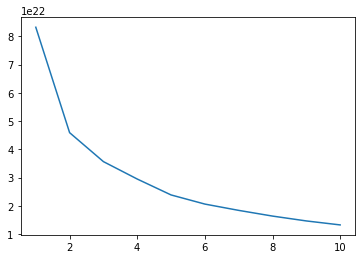

In [699]:
plt.plot(range(1,11),wcss)

In [700]:
X = final_df.iloc[:,:].values
X

array([[2.0e+00, 5.0e+00, 4.9e+01, ..., 3.0e+06, 3.0e+06, 9.5e+00],
       [2.0e+00, 5.0e+00, 4.9e+01, ..., 3.0e+06, 3.0e+06, 9.5e+00],
       [2.0e+00, 5.0e+00, 4.9e+01, ..., 0.0e+00, 0.0e+00, 9.5e+00],
       ...,
       [1.0e+00, 5.0e+00, 6.8e+01, ..., 0.0e+00, 2.5e+08, 0.0e+00],
       [1.0e+00, 5.0e+00, 6.8e+01, ..., 0.0e+00, 5.0e+08, 0.0e+00],
       [1.0e+00, 5.0e+00, 6.8e+01, ..., 0.0e+00, 2.5e+08, 0.0e+00]])

In [701]:
km = KMeans(n_clusters=6)


In [702]:
y_means = km.fit_predict(X)

In [703]:
y_means

array([0, 0, 0, ..., 0, 0, 0])

In [704]:
final_df['cluster']=y_means


C:\Users\chira\AppData\Local\Temp/ipykernel_13640/1345402471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cluster']=y_means


In [705]:
final_df.head()

,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk,cluster
0,2,5,49,32,13,13,1,11,0,0,0,0,0,3000000,3000000,3000000.0,9.5,0
1,2,5,49,62,13,13,1,11,0,0,0,0,0,3000000,3000000,3000000.0,9.5,0
2,2,5,49,13,13,13,1,11,0,0,0,0,0,0,0,0.0,9.5,0
3,2,5,49,32,7,7,1,11,0,0,0,0,0,150000000,150000000,0.0,9.5,0
4,2,5,49,62,7,7,1,11,0,0,0,0,0,150000000,150000000,0.0,9.5,0


In [706]:
len(y_means)

15577

In [707]:
len(X[y_means==5,5])

464

In [708]:
len(X[y_means==5,6])

464

In [709]:
len(X[y_means==4,1])

877

In [710]:
len(X[y_means==4,3])

877

In [711]:
final_df1 = final_df[final_df.cluster==0]
final_df2 = final_df[final_df.cluster==1]
final_df3 = final_df[final_df.cluster==2]
final_df4 = final_df[final_df.cluster==3]
final_df5 = final_df[final_df.cluster==4]
final_df6 = final_df[final_df.cluster==5]

No handles with labels found to put in legend.


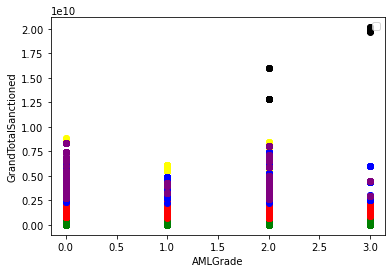

In [712]:
plt.scatter(final_df1.AMLGrade,final_df1['GrandTotalSanctioned'],color='green')
plt.scatter(final_df2.AMLGrade,final_df2['GrandTotalSanctioned'],color='red')
plt.scatter(final_df3.AMLGrade,final_df3['GrandTotalSanctioned'],color='black')
plt.scatter(final_df4.AMLGrade,final_df4['GrandTotalSanctioned'],color='yellow')
plt.scatter(final_df5.AMLGrade,final_df5['GrandTotalSanctioned'],color='blue')
plt.scatter(final_df6.AMLGrade,final_df6['GrandTotalSanctioned'],color='purple')
plt.xlabel('AMLGrade')
plt.ylabel('GrandTotalSanctioned')
plt.legend()


In [713]:
final_df['cluster'].value_counts()

0    11178
1     2853
4      877
5      464
3      167
2       38
Name: cluster, dtype: int64

In [714]:
final_df['cluster'].value_counts().sort_index()

0    11178
1     2853
2       38
3      167
4      877
5      464
Name: cluster, dtype: int64

In [715]:
clust_mean=final_df.groupby('cluster').mean().reset_index()
clust_mean

,cluster,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk
0,0,1.138844,1.532832,53.906423,35.679907,7.938719,7.938719,6.368402,7.357130,3.299170e+07,2.527598e+07,7.715723e+06,6.875521e+06,1.928711e+08,2.822959e+08,8.942482e+07,9.463112e+07,3.940659
1,1,1.266737,1.434630,47.302839,39.720645,6.529618,6.529618,3.567823,5.973361,2.540637e+08,1.908562e+08,6.320754e+07,3.968752e+07,9.865971e+08,1.523928e+09,5.373311e+08,4.870055e+08,4.700298
2,2,2.394737,4.447368,79.500000,30.868421,6.631579,6.631579,5.473684,5.921053,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.187107e+10,1.599372e+10,4.122658e+09,3.418750e+09,5.405000
3,3,1.676647,2.000000,88.856287,43.796407,5.670659,5.670659,3.994012,5.065868,3.175109e+09,3.162447e+09,1.266228e+07,3.216587e+08,6.069861e+09,6.103909e+09,3.404790e+07,1.078399e+09,4.482575
4,4,1.179019,1.285063,51.278221,44.319270,5.353478,5.353478,3.051311,5.588369,3.359690e+08,3.031058e+08,3.286317e+07,7.171334e+07,3.391332e+09,3.747971e+09,3.566390e+08,8.361847e+08,3.557446
5,5,1.058190,1.290948,42.773707,36.508621,5.756466,5.756466,1.668103,5.678879,3.056748e+08,7.961810e+07,2.260567e+08,5.571897e+07,8.060599e+08,4.544913e+09,3.738853e+09,1.218245e+09,5.098254


In [716]:
clust_mean['freq']=final_df['cluster'].value_counts().sort_index()
clust_mean

,cluster,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk,freq
0,0,1.138844,1.532832,53.906423,35.679907,7.938719,7.938719,6.368402,7.357130,3.299170e+07,2.527598e+07,7.715723e+06,6.875521e+06,1.928711e+08,2.822959e+08,8.942482e+07,9.463112e+07,3.940659,11178
1,1,1.266737,1.434630,47.302839,39.720645,6.529618,6.529618,3.567823,5.973361,2.540637e+08,1.908562e+08,6.320754e+07,3.968752e+07,9.865971e+08,1.523928e+09,5.373311e+08,4.870055e+08,4.700298,2853
2,2,2.394737,4.447368,79.500000,30.868421,6.631579,6.631579,5.473684,5.921053,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.187107e+10,1.599372e+10,4.122658e+09,3.418750e+09,5.405000,38
3,3,1.676647,2.000000,88.856287,43.796407,5.670659,5.670659,3.994012,5.065868,3.175109e+09,3.162447e+09,1.266228e+07,3.216587e+08,6.069861e+09,6.103909e+09,3.404790e+07,1.078399e+09,4.482575,167
4,4,1.179019,1.285063,51.278221,44.319270,5.353478,5.353478,3.051311,5.588369,3.359690e+08,3.031058e+08,3.286317e+07,7.171334e+07,3.391332e+09,3.747971e+09,3.566390e+08,8.361847e+08,3.557446,877
5,5,1.058190,1.290948,42.773707,36.508621,5.756466,5.756466,1.668103,5.678879,3.056748e+08,7.961810e+07,2.260567e+08,5.571897e+07,8.060599e+08,4.544913e+09,3.738853e+09,1.218245e+09,5.098254,464


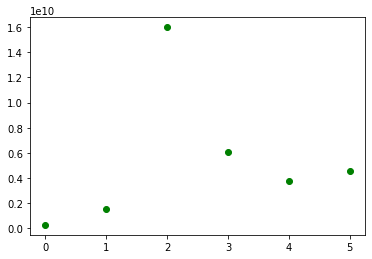

In [717]:
plt.scatter(clust_mean.cluster,clust_mean['GrandTotalSanctioned'],color='green')


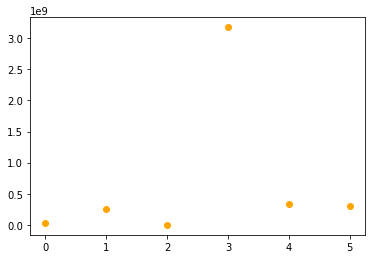

In [718]:
plt.scatter(clust_mean.cluster,clust_mean['GrandTotalOutStanding'],color='orange')


In [719]:
final_df.groupby('cluster').max()

,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk
cluster,,,,,,,,,,,,,,,,,
0,3,7,135,74,13,13,18,11,1231900000,913300000,1231900000,1231900000,904700000,1100000000,1060000000,1.500000e+09,10.00
1,3,6,133,74,13,13,18,11,2222000000,2222000000,1341400000,2000000000,2422000000,3300000000,2500000000,2.500000e+09,10.00
2,3,6,120,71,8,8,10,7,0,0,0,0,19785500000,20150000000,19650000000,1.976000e+10,7.01
3,2,5,128,73,13,13,11,11,5824700000,5824700000,349100000,4750000000,8850000000,8850000000,501000000,8.000000e+09,10.00
4,3,6,133,74,13,13,11,11,3155000000,2222000000,1405000000,2593200000,6000000000,7400000000,2018800000,1.000000e+10,10.00
5,3,6,120,74,13,13,13,11,4120000000,1250000000,4120000000,4120000000,3600000000,8400000000,8000000000,5.500000e+09,10.00


In [720]:
final_df.groupby('cluster').min()

,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk
cluster,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,740000000,0,0.0,0.0
2,2,3,41,1,5,5,1,5,0,0,0,0,0,12800000000,0,0.0,0.0
3,0,0,1,1,3,3,1,3,0,0,0,0,5000000000,5000000000,0,0.0,0.0
4,0,0,1,1,0,0,1,0,0,0,0,0,1750000000,2222000000,0,0.0,0.0
5,0,0,1,1,0,0,1,0,0,0,0,0,0,2600000000,2018800000,0.0,0.0


In [749]:
final_df.groupby('cluster').count()

,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk
cluster,,,,,,,,,,,,,,,,,
0,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178
1,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853
2,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
3,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167
4,877,877,877,877,877,877,877,877,877,877,877,877,877,877,877,877,877
5,464,464,464,464,464,464,464,464,464,464,464,464,464,464,464,464,464


In [721]:
X_cat2["DirectIndirect"] 

0        1
1        1
2        0
3        1
4        1
        ..
15572    1
15573    1
15574    1
15575    1
15576    1
Name: DirectIndirect, Length: 15577, dtype: int32

In [722]:
ldi=list(X_cat1["DirectIndirect"] )
ldi

['Direct',
 'Direct',
 nan,
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 nan,
 'Direct',
 'Direct',
 nan,
 nan,
 nan,
 'Direct',
 'Direct',
 'Direct',
 nan,
 nan,
 'Direct',
 'Direct',
 nan,
 nan,
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 nan,
 nan,
 nan,
 'Direct',
 'Direct',
 nan,
 'Direct',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 nan,
 'Direct',
 nan,
 nan,
 nan,
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 'Direct',
 nan,
 nan,
 nan,
 nan,


In [723]:
ldi_value=label_encoder.fit_transform(ldi)
ldi_value

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

In [724]:
ldi_keys=label_encoder.inverse_transform(label_encoder.fit_transform(ldi))
ldi_keys

array(['Direct', 'Direct', 'nan', ..., 'Direct', 'Direct', 'Direct'],
      dtype='<U32')

In [725]:
mergeLists_ldi = dict(zip(ldi_keys, ldi_value))
mergeLists_ldi

{'Direct': 0, 'nan': 2, 'InDirect': 1}

In [726]:
col1

['AMLGrade',
 'PurposeOfCAM',
 'UWSDeviation',
 'CRILCStatus',
 'Industry',
 'FacilitySubtype',
 'InternalRating',
 'ApplicationRating',
 'WorkflowName',
 'OverRideRating']

In [727]:
def decoding(colmns):
    c_list=list(X_cat1[colmns])
    c_value=label_encoder.fit_transform(c_list)
    c_keys=label_encoder.inverse_transform(label_encoder.fit_transform(c_list))
    mergeLists_c = dict(zip( c_value,c_keys))
    print(mergeLists_c)

    

In [728]:
decoding('OverRideRating')

{11: 'nan', 7: 'ABC-7A', 3: 'ABC-3', 2: 'ABC-2', 6: 'ABC-6', 5: 'ABC-5', 4: 'ABC-4', 8: 'ABC-7B', 10: 'ABC-9', 0: 'ABC-1', 9: 'ABC-8', 1: 'ABC-10'}


In [729]:
decoding('PurposeOfCAM')

{4: 'NTB Custom', 2: 'Interim Re', 5: 'New with t', 0: 'Annual Rev', 1: 'Closure Of', 3: 'Modificati', 6: 'Others', 7: 'nan'}


In [730]:
decoding('CRILCStatus')

{4: 'nan', 0: 'Not Found', 1: 'SMA 0', 2: 'SMA 1', 3: 'SMA 2'}


In [731]:
decoding('Industry')

{49: '(IND060) POWER- NON-CONVENTIONAL ENERGY', 62: '(IND076) OTHER INDUSTRIES', 36: '(IND041) AUTOMOBILE - OTHERS', 22: '(IND026) PHARMACEUTICAL', 38: '(IND043) CONTRACTORS - BUILDING RESIDENTIAL/ COMMERCIAL/ INDUSTRIAL', 131: '(IND169) FISHING/ AQUACULTURE', 82: '(IND097) OTHER SERVICES', 63: '(IND077) NBFC-MFI', 28: '(IND033) IRON & STEEL', 39: '(IND044) CONTRACTORS- ROADS/ IRRIGATION/ MUNICIPALITIES', 2: '(IND003) SUGAR', 40: '(IND045) CONTRACTORS- EPC/ SPECIALIZED JOBS', 37: '(IND042) GEMS/ JEWELLERY - MFG.', 45: '(IND050) AIRPORT', 59: '(IND073) REAL-ESTATE DEVELOPERS', 44: '(IND049) ROAD/ TUNNEL/ BRIDGES (BOT, BOOT)', 13: '(IND014) COTTON SPINNING/ YARN', 16: '(IND020) LEATHER & PRODUCTS', 112: '(IND143) APPAREL MANUFACTURERS', 35: '(IND040) AUTO ANCILIARIES', 100: '(IND120) FMCG', 68: '(IND083) NBFC- Others', 128: '(IND164) AGRI SUPPORT SERVICES', 97: '(IND112) TRADER- OTHERS', 77: '(IND092) HOSPITALS -NON-INFRA/ DIAGNOSTIC SERVICES/ TPAs', 105: '(IND126) TELECOMMUNICATION & TE

In [732]:
decoding('AMLGrade')

{1: 'Low', 2: 'Medium', 0: 'High', 3: 'nan'}


In [733]:
decoding('UWSDeviation')

{0: 'No', 1: 'Yes'}


In [734]:
decoding('FacilitySubtype')

{31: 'LC Capex usance Secured', 61: 'Short Term Loan Secured', 74: 'nan', 33: 'LC Secured', 15: 'Commercial Credit Card', 51: 'Perf BG Secured', 14: 'Cash Credit Unsecured', 73: 'Working Capital Demand Loan Unsecured', 62: 'Short Term Loan Unsecured', 34: 'LC Unsecured', 41: "LuT for Buyers' Credit Unsecured", 7: 'Bills Discounted Unsecured', 36: 'LER', 65: 'Term Loan Secured', 46: 'Overdraft Unsecured', 42: 'OD against FD', 63: 'Short Term Loan against FD', 13: 'Cash Credit Secured', 72: 'Working Capital Demand Loan Secured', 49: 'Packing Credit Secured', 6: 'Bills Discounted Secured', 1: 'BG Secured', 53: 'Post shipment credit Secured', 40: "LuT for Buyers' Credit Secured", 18: 'EPC (INR) Secured', 47: 'PC (FCY) Secured', 45: 'Overdraft Secured', 57: 'SBLC Unsecured', 59: 'Sales Bills Discounting(Vendor Finance)', 70: 'Vendor Anchor Line', 16: 'Dealer Anchor Line', 52: 'Perf BG Unsecured', 29: 'Invoice Discounting Secured', 48: 'PC (FCY) Unsecured', 54: 'Post shipment credit Unsecure

In [735]:
decoding('InternalRating')

{12: 'UnRated', 7: 'ABC-7A', 4: 'ABC-4', 11: 'ABC-CB', 6: 'ABC-6', 5: 'ABC-5', 3: 'ABC-3', 8: 'ABC-7B', 2: 'ABC-2', 0: 'ABC-1', 1: 'ABC-10', 13: 'nan', 9: 'ABC-8', 10: 'ABC-9'}


In [736]:
decoding('WorkflowName')

{1: 'APPWF_CIB', 10: 'SFCAWF_CIB', 6: 'APPWF_MME', 5: 'APPWF_IFI', 3: 'APPWF_G&J', 2: 'APPWF_FIG', 9: 'APPWF_SME', 18: 'SFCAWF_SME', 15: 'SFCAWF_MME', 17: 'SFCAWF_SCF', 8: 'APPWF_SCF', 7: 'APPWF_MNC', 11: 'SFCAWF_FIG', 4: 'APPWF_GB', 13: 'SFCAWF_GB', 14: 'SFCAWF_IFI', 16: 'SFCAWF_MNC', 12: 'SFCAWF_G&J', 0: 'APPWF_AGRI'}


In [737]:
decoding('OverRideRating')

{11: 'nan', 7: 'ABC-7A', 3: 'ABC-3', 2: 'ABC-2', 6: 'ABC-6', 5: 'ABC-5', 4: 'ABC-4', 8: 'ABC-7B', 10: 'ABC-9', 0: 'ABC-1', 9: 'ABC-8', 1: 'ABC-10'}


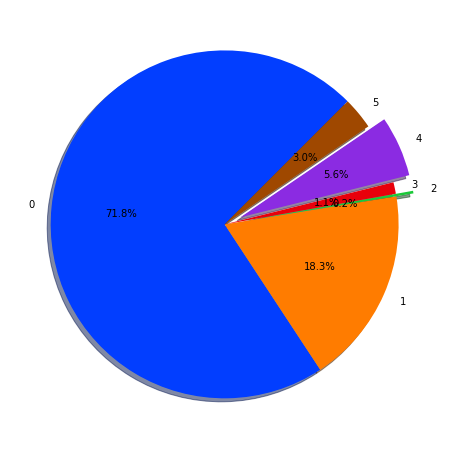

In [738]:
colors = sns.color_palette('bright')
plt.figure(figsize=(8,8))

plt.pie(clust_mean['freq'], labels=clust_mean['cluster'],explode = (0, 0,0.1,0, 0.1, 0),autopct='%1.1f%%',shadow=True, startangle=45, colors=colors)
plt.show()

In [739]:
clust_mean

,cluster,AMLGrade,PurposeOfCAM,Industry,FacilitySubtype,InternalRating,ApplicationRating,WorkflowName,OverRideRating,GrandTotalOutStanding,TotalFundedOutStanding,TotalNonFundedOutStanding,OutStandingAmount,TotalFundedSanctioned,GrandTotalSanctioned,TotalNonFundedSanctioned,SanctionedAmount,FinancialRisk,freq
0,0,1.138844,1.532832,53.906423,35.679907,7.938719,7.938719,6.368402,7.357130,3.299170e+07,2.527598e+07,7.715723e+06,6.875521e+06,1.928711e+08,2.822959e+08,8.942482e+07,9.463112e+07,3.940659,11178
1,1,1.266737,1.434630,47.302839,39.720645,6.529618,6.529618,3.567823,5.973361,2.540637e+08,1.908562e+08,6.320754e+07,3.968752e+07,9.865971e+08,1.523928e+09,5.373311e+08,4.870055e+08,4.700298,2853
2,2,2.394737,4.447368,79.500000,30.868421,6.631579,6.631579,5.473684,5.921053,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.187107e+10,1.599372e+10,4.122658e+09,3.418750e+09,5.405000,38
3,3,1.676647,2.000000,88.856287,43.796407,5.670659,5.670659,3.994012,5.065868,3.175109e+09,3.162447e+09,1.266228e+07,3.216587e+08,6.069861e+09,6.103909e+09,3.404790e+07,1.078399e+09,4.482575,167
4,4,1.179019,1.285063,51.278221,44.319270,5.353478,5.353478,3.051311,5.588369,3.359690e+08,3.031058e+08,3.286317e+07,7.171334e+07,3.391332e+09,3.747971e+09,3.566390e+08,8.361847e+08,3.557446,877
5,5,1.058190,1.290948,42.773707,36.508621,5.756466,5.756466,1.668103,5.678879,3.056748e+08,7.961810e+07,2.260567e+08,5.571897e+07,8.060599e+08,4.544913e+09,3.738853e+09,1.218245e+09,5.098254,464


In [742]:
X_cat1['AMLGrade'].value_counts()

Low       7310
Medium     962
High       734
Name: AMLGrade, dtype: int64

In [743]:
decoding('AMLGrade')

{1: 'Low', 2: 'Medium', 0: 'High', 3: 'nan'}


In [745]:
X_cat1['FacilitySubtype'].value_counts()

Term Loan Secured                   2053
Cash Credit Secured                 1492
BG Secured                          1380
LER                                 1376
LC Secured                          1175
                                    ... 
Export Bills Purchased Unsecured       2
LuT for Buyers Credit Secured          1
ECB Term Loan                          1
Usance LC Unsecured                    1
Bid Bond BG Unsecured                  1
Name: FacilitySubtype, Length: 74, dtype: int64

In [746]:
decoding('FacilitySubtype')

{31: 'LC Capex usance Secured', 61: 'Short Term Loan Secured', 74: 'nan', 33: 'LC Secured', 15: 'Commercial Credit Card', 51: 'Perf BG Secured', 14: 'Cash Credit Unsecured', 73: 'Working Capital Demand Loan Unsecured', 62: 'Short Term Loan Unsecured', 34: 'LC Unsecured', 41: "LuT for Buyers' Credit Unsecured", 7: 'Bills Discounted Unsecured', 36: 'LER', 65: 'Term Loan Secured', 46: 'Overdraft Unsecured', 42: 'OD against FD', 63: 'Short Term Loan against FD', 13: 'Cash Credit Secured', 72: 'Working Capital Demand Loan Secured', 49: 'Packing Credit Secured', 6: 'Bills Discounted Secured', 1: 'BG Secured', 53: 'Post shipment credit Secured', 40: "LuT for Buyers' Credit Secured", 18: 'EPC (INR) Secured', 47: 'PC (FCY) Secured', 45: 'Overdraft Secured', 57: 'SBLC Unsecured', 59: 'Sales Bills Discounting(Vendor Finance)', 70: 'Vendor Anchor Line', 16: 'Dealer Anchor Line', 52: 'Perf BG Unsecured', 29: 'Invoice Discounting Secured', 48: 'PC (FCY) Unsecured', 54: 'Post shipment credit Unsecure

# The insights from the project work are written to give a personal view about the work you did.



1. First, write down the introduction:


#### The Banking Data Model is a scope of the Financial Industry Business Data Model (FIB-DM), the largest reference standard for Retail, Commercial, and Investment Banks.                                                                                                                                                   These banks are deals in providing Funded & NON Funded Loans to the Different Types of Industires on the basis of  their Internal & External Ratings by Approving Authorithies

CLUSTER0

#### This data insights tells that 'TELECOMMUNICATION TOWERS' Industry having WorkflowName of 'APPWF_MME'  with 'Interim Review' is the PurposeOfCAM for the 'LOW' Aml grade having 'ABC-7A' is the OverRide Rating & 'ABC-8' is the Internal Rating with Facility Subtype of 'LCBD(Bank Line) are the most likely Customer of the Banks 

 CLUSTER2

#### The Banking Departments should have more concerned about the 'Sugar' & 'EDIBLE OILS & VANASPATI' Industries having Workflow of both 'APPWF_MME' & 'APPWF_IFI with 'NTB Custom' & 'New with t' is thePurposeOfCAM for the  'MEDIUM' AML grade having 'ABC-6' is the OverRide Rating & 'ABC-7A' is the Internal Rating with Facility Subtype of 'LC Capex usance Secured' 